# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Configuration" data-toc-modified-id="Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Configuration</a></div><div class="lev1 toc-item"><a href="#Increase-of-sequences-in-the-short-read-archive-(SRA)" data-toc-modified-id="Increase-of-sequences-in-the-short-read-archive-(SRA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Increase of sequences in the short read archive (SRA)</a></div><div class="lev2 toc-item"><a href="#Download-and-import-data" data-toc-modified-id="Download-and-import-data-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Download and import data</a></div><div class="lev2 toc-item"><a href="#Bases-vs-bytes" data-toc-modified-id="Bases-vs-bytes-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Bases <em>vs</em> bytes</a></div><div class="lev2 toc-item"><a href="#Submission-rate" data-toc-modified-id="Submission-rate-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Submission rate</a></div><div class="lev1 toc-item"><a href="#Diversity-of-the-SRA-datasets" data-toc-modified-id="Diversity-of-the-SRA-datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diversity of the SRA datasets</a></div><div class="lev2 toc-item"><a href="#Download-and-import-data" data-toc-modified-id="Download-and-import-data-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Download and import data</a></div><div class="lev2 toc-item"><a href="#Number-of-entries-and-bases-per-category" data-toc-modified-id="Number-of-entries-and-bases-per-category-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number of entries and bases per category</a></div><div class="lev1 toc-item"><a href="#Sequences-generated-by-the-4DGenome" data-toc-modified-id="Sequences-generated-by-the-4DGenome-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sequences generated by the 4DGenome</a></div>

# Introduction

Analyses performed for the manuscript.

# Configuration

In [1]:
%pylab inline

# load python packages
import os
import os.path
import pandas as pd
import glob
from IPython.core.display import Image
from scipy import stats
from matplotlib_venn import *
import seaborn as sns
import numpy as np

# matplotlib options
plt.rcParams['font.size'] = 20 
plt.rcParams['font.weight'] = 'medium' 
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.sans-serif'] = 'Arial' 
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# seaborn options
sns.set_context("talk", font_scale = 1.5)
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [2]:
project = 'jquilez'
analysis = '2017-04-07_analyses_manuscript'
PROJECT = '/Volumes/users-GR-mb-jquilez/projects/conseq/projects/%s' % project
ANALYSIS = '%s/analysis/%s' % (PROJECT, analysis)

# Increase of sequences in the short read archive (SRA)

Analysis of the growth of the short read archive ([SRA](https://www.ncbi.nlm.nih.gov/sra/)).

## Download and import data

Data with the SRA database growth was downloaded from [here](https://trace.ncbi.nlm.nih.gov/Traces/sra/sra.cgi?), which shows the number of bases and bytes at different dates.

In [3]:
def import_sra_stat():
    
    # import file
    icsv = '%s/data/sra_stat_growth.csv' % ANALYSIS
    df = pd.read_table(icsv, sep = ',')
    return df

In [4]:
import_sra_stat().head()

,date,bases,open_access_bases,bytes,open_access_bytes
0,06/05/2007,20304190150,20304190150,50496285115,50496285115
1,04/04/2008,39753724527,39753724527,98578509466,98578509466
2,04/05/2008,41358022149,41358022149,102560743983,102560743983
3,04/09/2008,41807184131,41807184131,103698289223,103698289223
4,04/15/2008,41932946619,41932946619,104004397361,104004397361


## Bases *vs* bytes

In [5]:
def bases_vs_bytes():
    
    def add_reference_line(panel, yvalue, ylabel):
        
        panel.axhline(log10(yvalue), color = 'gray', linewidth = 0.50, linestyle = '--')
        panel.text('2015/09/01', log10(yvalue) - 0.40, ylabel, color = 'gray', fontsize = 16)
        
    # load data
    df = import_sra_stat()
    
    # plot backbone
    plt.close('all')
    f, axes = plt.subplots(1, 3, figsize = (20, 5)) 
    plt.subplots_adjust(wspace = 0.50, hspace = 0.50)
    colors = sns.color_palette("Paired")

    # format dates
    df['date'] = pd.to_datetime(df['date'])
       
    # evolution of cumulative bases vs bytes
    panel = axes[0]
    panel.plot(df['date'], log10(df['bases']), color = colors[1], label = 'bases')
    panel.plot(df['date'], log10(df['bytes']), color = colors[0], label = 'bytes')
    plt.setp(panel.xaxis.get_majorticklabels(), rotation = 90)
    panel.set_xlabel('Year', labelpad = 25)
    panel.set_ylabel('Total [log10]', labelpad = 25)
    panel.legend(loc = 'upper left', fontsize = 16)
    add_reference_line(panel, 1e12, 'Tera')
    add_reference_line(panel, 1e15, 'Peta')

    # cumulative bases vs bytes
    panel = axes[1]
    panel.scatter(log10(df['bases']), log10(df['bytes']), color = colors[3], alpha = 0.50,
                 label = 'Total')
    panel.scatter(log10(df.bases.diff()), log10(df.bytes.diff()), color = colors[2], alpha = 0.50,
                 label = 'Per time point')
    panel.legend(loc = 'upper left', fontsize = 14)

    # labels and decorations
    panel.set_xlim(10, 17)
    panel.set_xlabel('Total bases [log10]', labelpad = 25)
    panel.set_ylim(10, 17)
    panel.set_ylabel('Total bytes [log10]', labelpad = 25)
    panel.plot(range(20), range(20), linestyle = '--', color = 'black', linewidth = 0.50)

    # byte-to-base ratio per time point
    panel = axes[2]
    panel.plot(df['date'], (1. * df.bytes.diff()) / df.bases.diff(), color = colors[2])
    plt.setp(panel.xaxis.get_majorticklabels(), rotation = 90)
    panel.axhline(1, color = 'black', linestyle = '--', linewidth = 0.50)
    panel.set_ylabel('Byte-to-base ratio per time point', labelpad = 25)
    
    # save figure
    opdf = '%s/figures/bases_vs_bytes.pdf' % (ANALYSIS)
    savefig(opdf, bbox_inches = 'tight', dpi = 300)

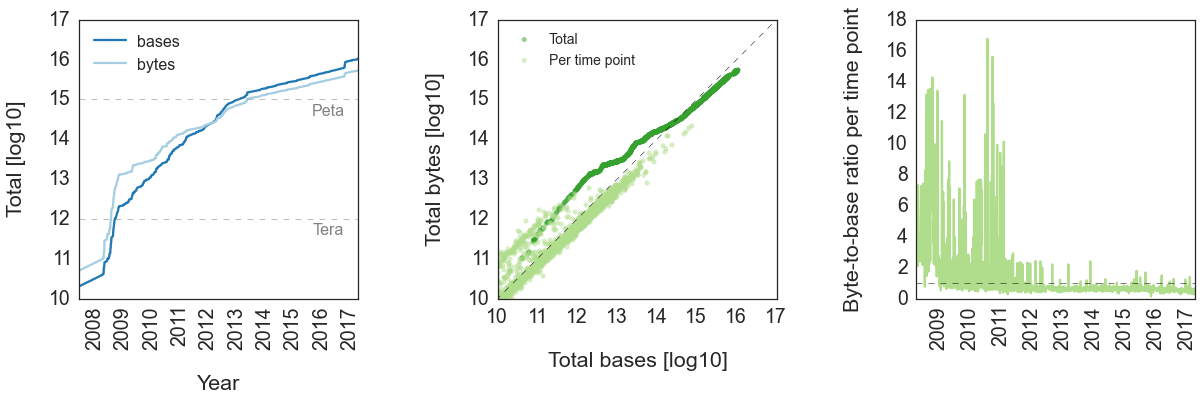

In [7]:
bases_vs_bytes()

- there was an abrupt increase in the number of sequences submitted ~2009 and the rate of submission has been steady since then
- in cumulative terms, there is > 1 byte/base regime until 2012-2013, near the Petabyte of data
- at the time point level, most of the submissions meet the 1-base-1-byte relationship, but this did not happen before ~2011

## Submission rate

In [8]:
def submission_rate():

    from statsmodels.nonparametric.smoothers_lowess import lowess

    # load data
    df = import_sra_stat()

    # format dates
    df['date'] = pd.to_datetime(df['date'])

    # calculate submission rate
    df['bases_diff'] = df.bases.diff()
    df['date_diff_days'] = df.date.diff().astype('timedelta64[s]') / (3600 * 24.)
    df.dropna(inplace = True)
    df['bases_rate'] = df.bases_diff / df.date_diff_days

    # plot backbone
    plt.close('all')
    f, axes = plt.subplots(1, 1, figsize = (10, 5)) 
    plt.subplots_adjust(wspace = 0.50, hspace = 0.50)
    colors = sns.color_palette("Paired")

    # evolution of cumulative bases vs bytes
    panel = axes
    panel.plot(df['date'], log10(df['bases_rate']), color = colors[1], label = 'bases')
    plt.setp(panel.xaxis.get_majorticklabels(), rotation = 90)
    panel.set_xlabel('Year', labelpad = 25)
    panel.set_ylabel('Submission rate [log10]', labelpad = 25)

    #print df[['date', 'bases_rate']].sort_values(['bases_rate'], ascending = False).head(n = 10)

    # moving average
    df['bases_rate_log10'] = log10(df['bases_rate'])
    df['bases_rate_log10_avg'] = df.bases_rate_log10.rolling(window = 365, center = True).mean()
    df.dropna(inplace = True)
    panel.plot(df['date'], df['bases_rate_log10_avg'], color = colors[4], linewidth = 5, 
               label = 'Moving average (1 year)')
    
    panel.legend(loc = 'upper left', fontsize = 16)

    # save figure
    opdf = '%s/figures/submission_rate.pdf' % (ANALYSIS)
    savefig(opdf, bbox_inches = 'tight', dpi = 300)

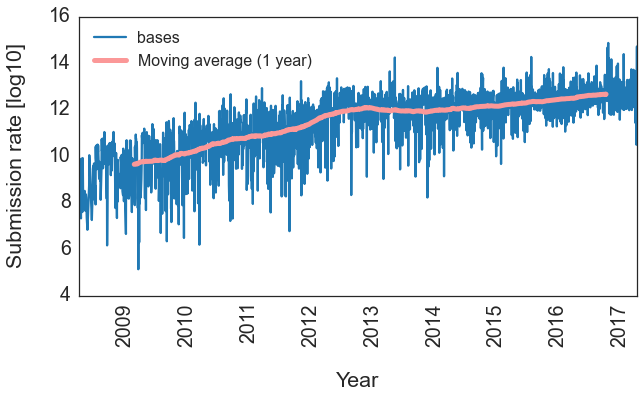

In [9]:
submission_rate()

- slowdown in the submission rate after 2013

In [10]:
def show_date(year):

    # load data
    df = import_sra_stat()

    # format dates
    df['date'] = pd.to_datetime(df['date'])
    
    _ = df[df['date'] > '%s/01/01' % str(year)].reset_index(drop = True)
    _['gigabases'] = _['bases'] / 1e9
    _['terabases'] = _['bases'] / 1e12
    _['petabases'] = _['bases'] / 1e15
    print _[['date', 'gigabases', 'terabases', 'petabases']].head(n = 1)

In [11]:
show_date(2008)

        date  gigabases  terabases  petabases
0 2008-04-04  39.753725   0.039754    0.00004


In [12]:
show_date(2009)

        date    gigabases  terabases  petabases
0 2009-01-05  2250.907163   2.250907   0.002251


In [13]:
show_date(2015)

        date     gigabases    terabases  petabases
0 2015-01-02  2.815328e+06  2815.328015   2.815328


In [14]:
show_date(2017)

        date     gigabases    terabases  petabases
0 2017-01-02  9.308621e+06  9308.620927   9.308621


# Diversity of the SRA datasets

## Download and import data

Data was searched with the [SRA Advanced Search Builder](https://www.ncbi.nlm.nih.gov/sra/advanced) with the following query :
- Search ("2007/01/01"[Publication Date] : "3000"[Publication Date])
- 2,859,356 entries

In [15]:
def import_sra_datasets():
    
    # import file
    icsv = '%s/data/sra_result.csv' % ANALYSIS
    df = pd.read_table(icsv, sep = ',', low_memory = False)
    print 'number initial entries = %i' % len(df)

    df = df.set_index('Experiment Accession')
    df.dropna(how = 'all', inplace = True)
    print 'number of entries with non-missing values in all fields = %i' % len(df)

    return df

In [16]:
sra_dataset = import_sra_datasets()

number initial entries = 2859356
number of entries with non-missing values in all fields = 2859356


In [17]:
sra_dataset.head()

,Experiment Title,Organism Name,Instrument,Submitter,Study Accession,Study Title,Sample Accession,Sample Title,"Total Size, Mb",Total RUNs,Total Spots,Total Bases,Library Name,Library Strategy,Library Source,Library Selection
Experiment Accession,,,,,,,,,,,,,,,,
SRX2771923,Melanotaenium endogenum CBS481.91 Transcriptome,Melanotaenium endogenum,Illumina HiSeq 2500,JGI,SRP105782,Melanotaenium endogenum CBS481.91 Transcriptome,SRS2155324,NaN,8944.85,1,67591250.0,2.041256e+10,AXCAB,RNA-Seq,TRANSCRIPTOMIC,RT-PCR
SRX2771922,Characterization of gut bacterial communities ...,gut metagenome,Illumina MiSeq,University of Minnesota,SRP070464,Capsule Patients,SRS2155323,NaN,38.82,1,130047.0,7.828829e+07,06_25Aug16,AMPLICON,METAGENOMIC,PCR
SRX2771921,Characterization of gut bacterial communities ...,gut metagenome,Illumina MiSeq,University of Minnesota,SRP070464,Capsule Patients,SRS2155320,NaN,37.35,1,124703.0,7.507121e+07,AB_03Dec16,AMPLICON,METAGENOMIC,PCR
SRX2771920,Characterization of gut bacterial communities ...,gut metagenome,Illumina MiSeq,University of Minnesota,SRP070464,Capsule Patients,SRS2155317,NaN,33.92,1,112119.0,6.749564e+07,AB_06Dec16,AMPLICON,METAGENOMIC,PCR
SRX2771919,Characterization of gut bacterial communities ...,gut metagenome,Illumina MiSeq,University of Minnesota,SRP070464,Capsule Patients,SRS2155315,NaN,25.21,1,81424.0,4.901725e+07,AB_14Dec16,AMPLICON,METAGENOMIC,PCR


## Number of entries and bases per category

In [18]:
def stats_by_category(category):

    if category == 'Instrument':
        ysize = 20
        bbox_to_anchor = 1.60
    elif category == 'Library Source':
        ysize = 4
        bbox_to_anchor = 1.80
    else:
        ysize = 12
        bbox_to_anchor = 1.80
                
    # plot backbone
    plt.close('all')
    f, axes = plt.subplots(1, 2, figsize = (20, ysize)) 
    plt.subplots_adjust(wspace = 1.00, hspace = 0.50)
    colors = sns.color_palette("Paired")
    
    # count number of SRA entries per category
    _ = sra_dataset[[category, 'Sample Accession']].groupby(category).count()
    _.columns = ['freq']
    _['rel_freq'] = _['freq'] / sum(_['freq'])
    _ = _.sort_values(['freq'], ascending = False)
    _ = _.reset_index()
    
    # save for later
    n_entries = _.copy()

    if category == 'Organism Name':
        _ = _.head(n = 25)
    elif category == 'Submitter':
        _ = _.head(n = 25)

    # plot
    panel = axes[0]
    sns.barplot(y = category, x = 'freq', data = _, orient = 'h', ax = panel,
                color = colors[1], alpha = 0.75)
    panel.set_xscale('log')
    panel.set_ylabel(category, labelpad = 25)
    panel.set_xlabel('Number of SRA entries', labelpad = 25, color = colors[1])
    
    panel2 = panel.twiny()
    _['cumsum_rel_freq'] = _['rel_freq'].cumsum()
    panel2.plot(_['rel_freq'], range(len(_)), color = colors[5], alpha = 0.75,
                label = 'Per %s' % category)
    panel2.plot(_['cumsum_rel_freq'], range(len(_)), color = colors[5], alpha = 0.75,
                linestyle = '--', label = 'Cumulative')
    panel2.set_xlabel('Relative frequency', labelpad = 25, color = colors[5], alpha = 0.75)
    panel2.set_xlim(0, 1)

    # count number of bases per category
    _ = sra_dataset[[category, 'Total Bases']].groupby(category).sum()
    _.columns = ['bases']
    _['rel_bases'] = _['bases'] / sum(_['bases'])
    _ = _.sort_values(['bases'], ascending = False) 
    _ = _.reset_index()
    
    # combine with the number of SRA entries
    #_ = pd.merge(n_entries, _, )
    print n_entries.head()
    
    # export
    name = category.lower().replace(' ', '_')
    otsv = '%s/tables/stats_by_%s.tsv' % (ANALYSIS, name)
    _.to_csv(otsv, sep = "\t", index = False)
    
    if category == 'Organism Name':
        _ = _.head(n = 25)        
    elif category == 'Submitter':
        _ = _.head(n = 25)
        
    # plot
    panel = axes[1]
    sns.barplot(y = category, x = 'bases', data = _, orient = 'h', ax = panel,
                color = colors[1], alpha = 0.75)
    panel.set_xscale('log')
    panel.set_xlabel('Number of bases', labelpad = 25, color = colors[1])
    panel.set_ylabel('')

    panel2 = panel.twiny()
    _['cumsum_rel_bases'] = _['rel_bases'].cumsum()
    panel2.plot(_['rel_bases'], range(len(_)), color = colors[5], alpha = 0.75,
                label = 'Per %s' % category)
    panel2.plot(_['cumsum_rel_bases'], range(len(_)), color = colors[5], alpha = 0.75,
                linestyle = '--', label = 'Cumulative')
    panel2.set_xlabel('Relative frequency', labelpad = 25, color = colors[5], alpha = 0.75)
    panel2.legend(bbox_to_anchor = (bbox_to_anchor, 1.00))
    panel2.set_xlim(0, 1)

    # save figure
    name = category.lower().replace(' ', '_')
    opdf = '%s/figures/stats_by_%s.pdf' % (ANALYSIS, name)
    savefig(opdf, bbox_inches = 'tight', dpi = 300)

                    Organism Name    freq  rel_freq
0                    Homo sapiens  775811  0.271469
1                    Mus musculus  254796  0.089157
2            human gut metagenome   99114  0.034682
3  Hordeum vulgare subsp. vulgare   84410  0.029536
4                 soil metagenome   79514  0.027823


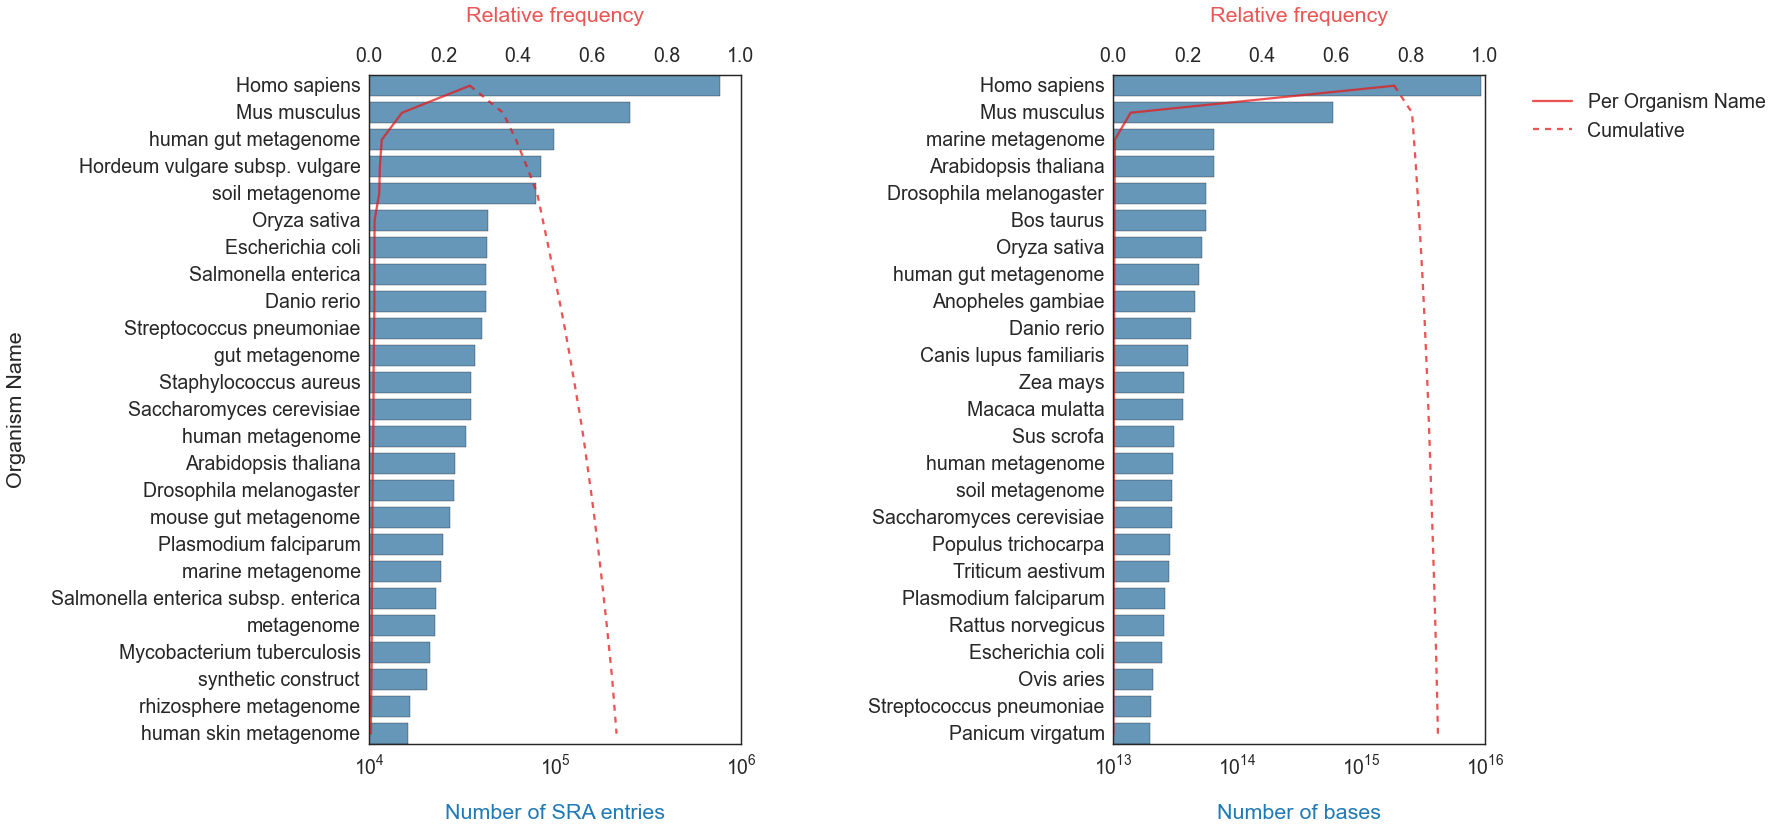

In [19]:
stats_by_category('Organism Name')

In [20]:
print len(set(sra_dataset['Organism Name']))

49677


                    Instrument     freq  rel_freq
0          Illumina HiSeq 2000  1249783  0.437089
1               Illumina MiSeq   482398  0.168710
2          Illumina HiSeq 2500   445008  0.155633
3          454 GS FLX Titanium   141909  0.049630
4  Illumina Genome Analyzer II   111123  0.038863


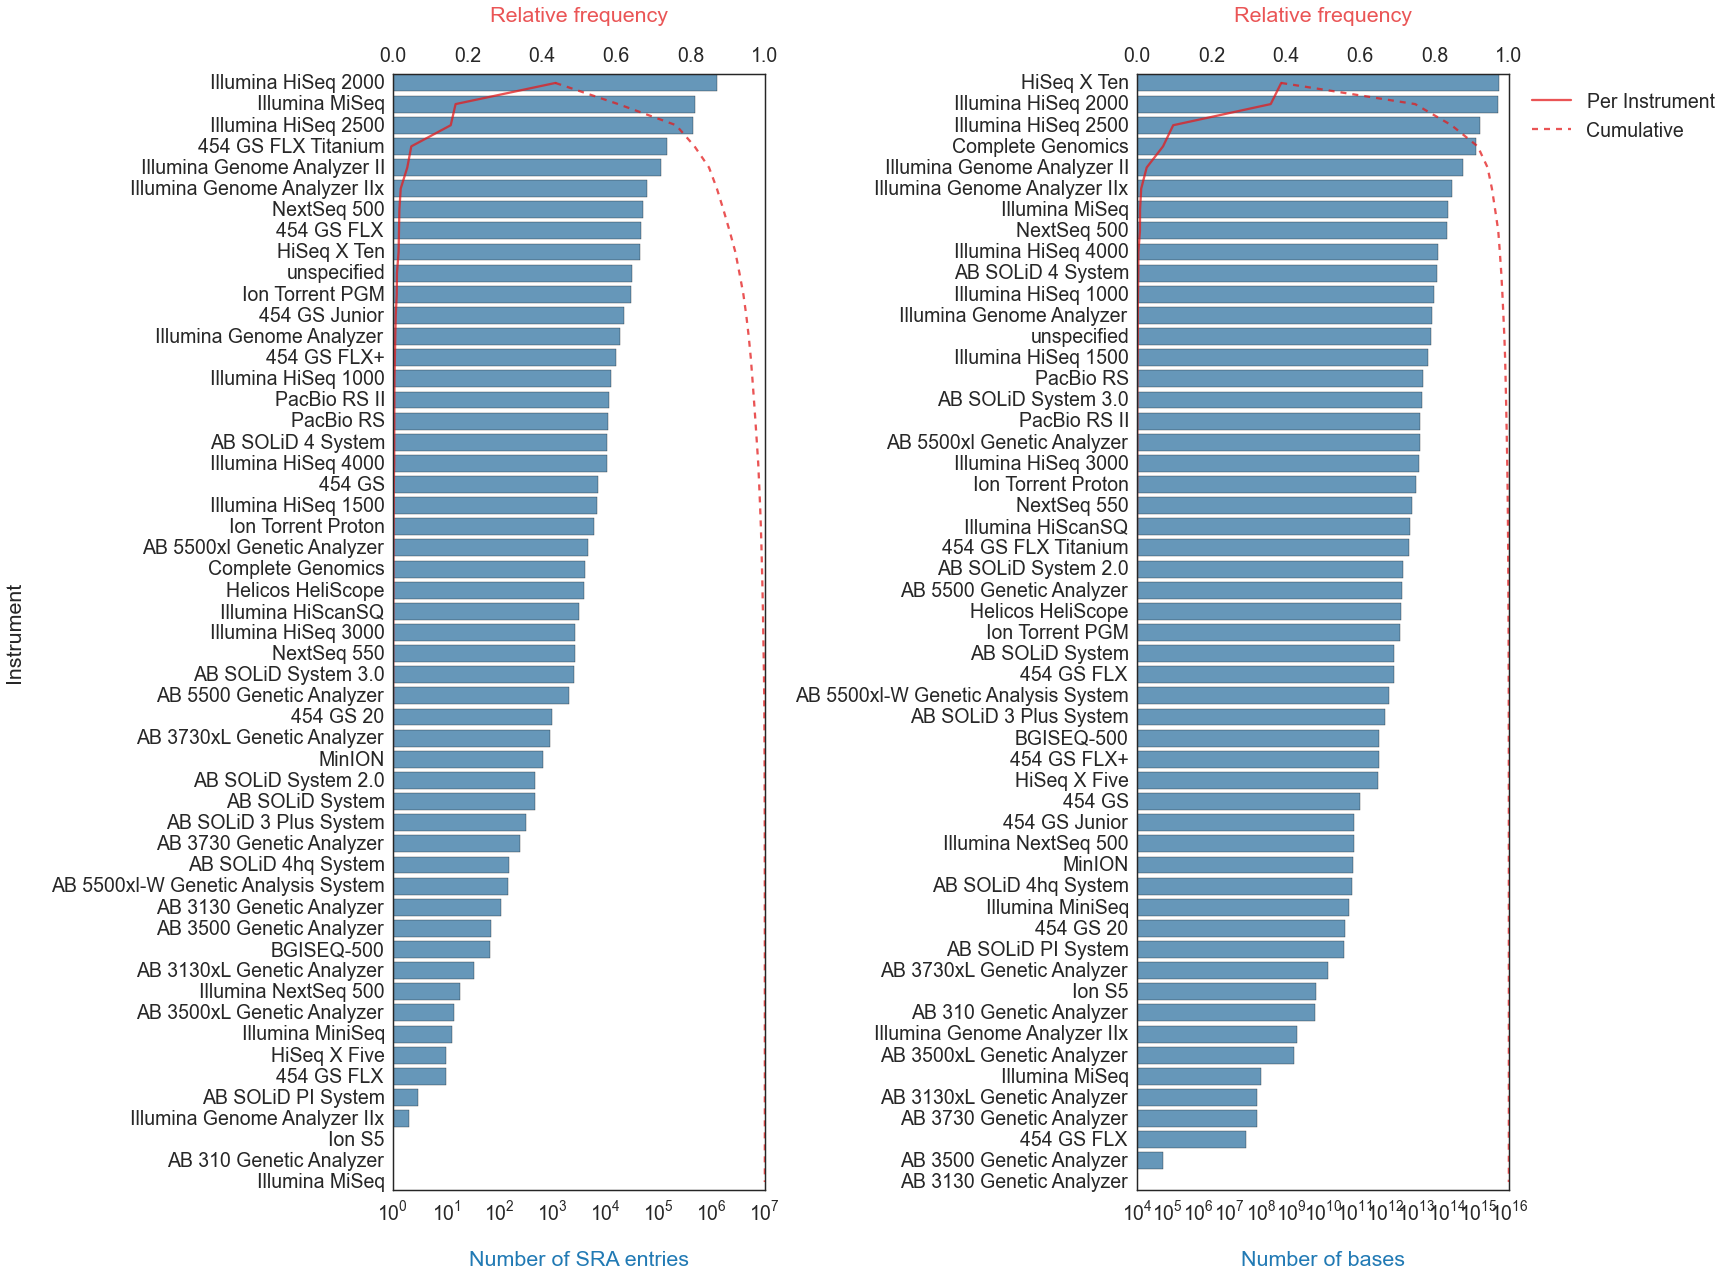

In [21]:
stats_by_category('Instrument')

  Library Strategy    freq  rel_freq
0              WGS  956577  0.334546
1         AMPLICON  562858  0.196849
2          RNA-Seq  519043  0.181526
3            OTHER  270698  0.094672
4              WXS  211816  0.074079


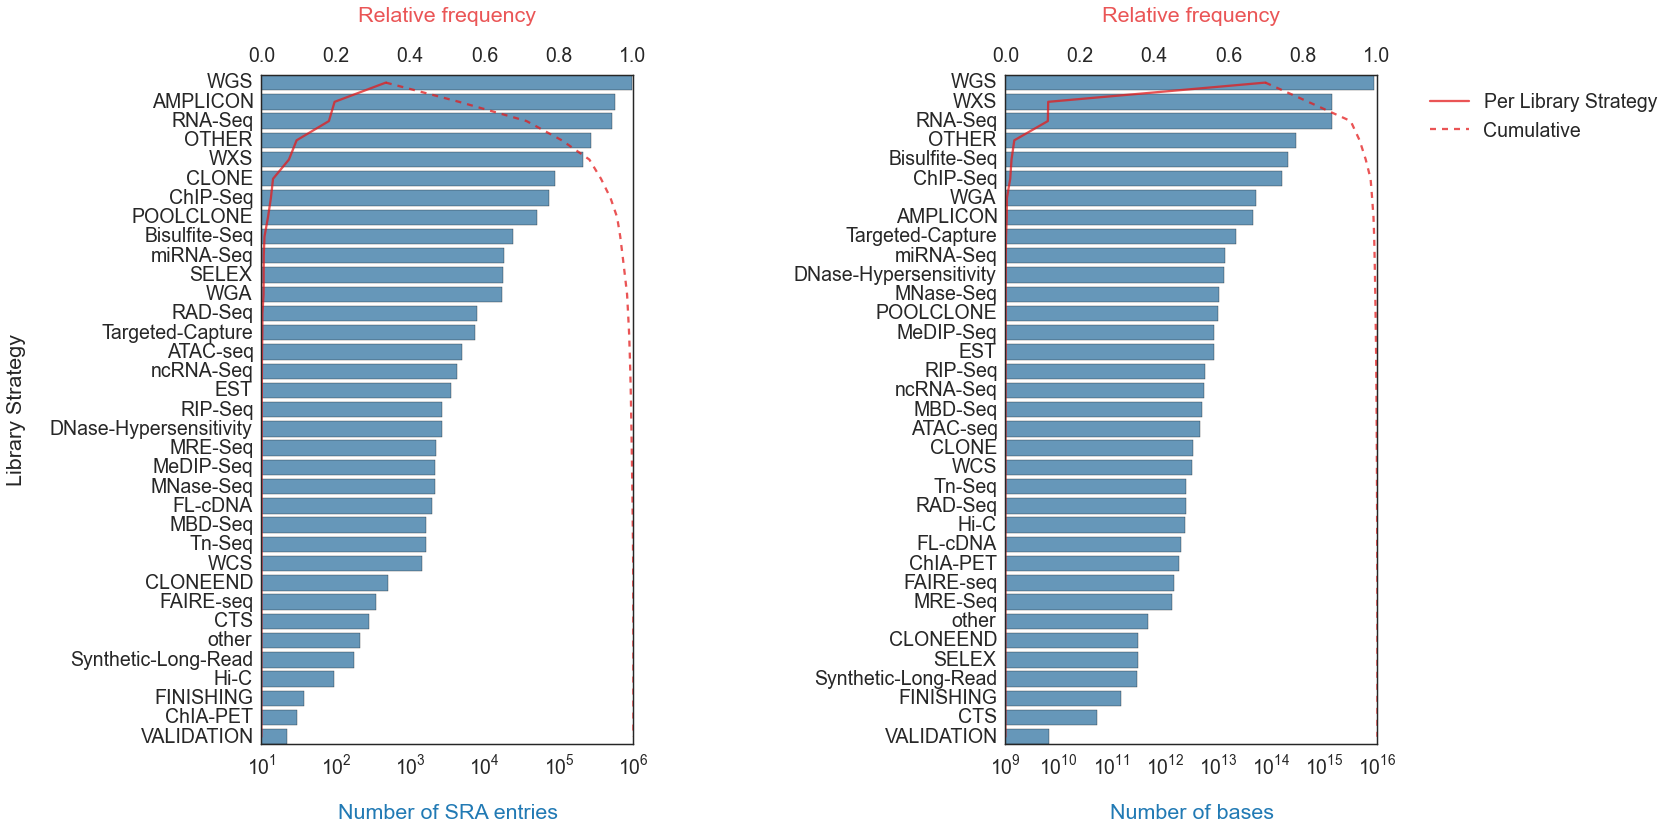

In [22]:
stats_by_category('Library Strategy')

   Library Source     freq  rel_freq
0         GENOMIC  1736217  0.607210
1  TRANSCRIPTOMIC   570739  0.199606
2     METAGENOMIC   477918  0.167143
3       SYNTHETIC    27390  0.009579
4       VIRAL RNA    18640  0.006519


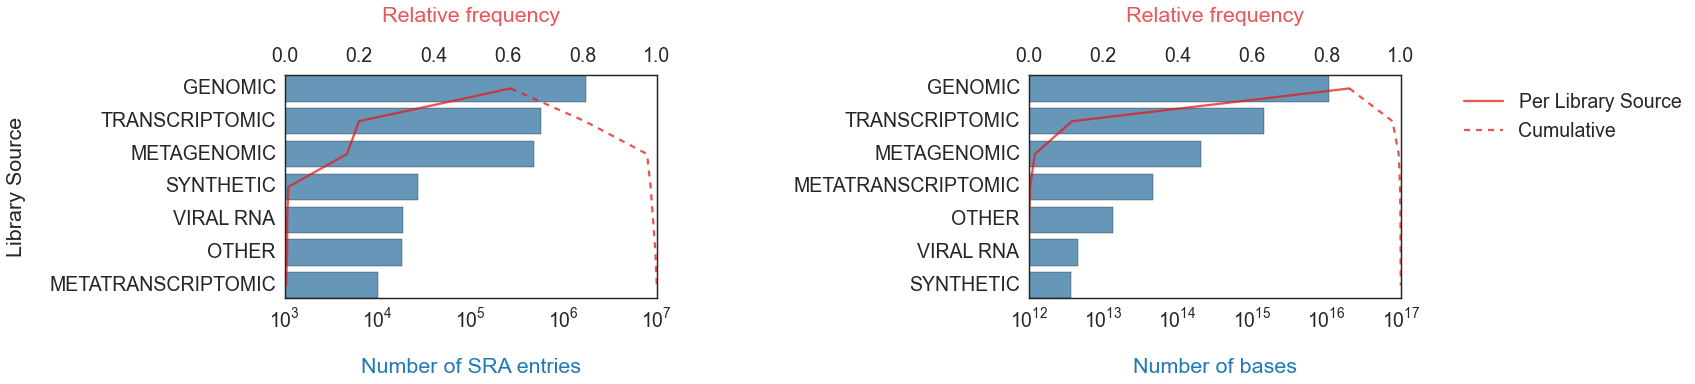

In [23]:
stats_by_category('Library Source')

  Submitter    freq  rel_freq
0       GEO  384618  0.153102
1        SC  181408  0.072212
2        BI  158907  0.063255
3       BGI  105487  0.041990
4      UCSD   87268  0.034738


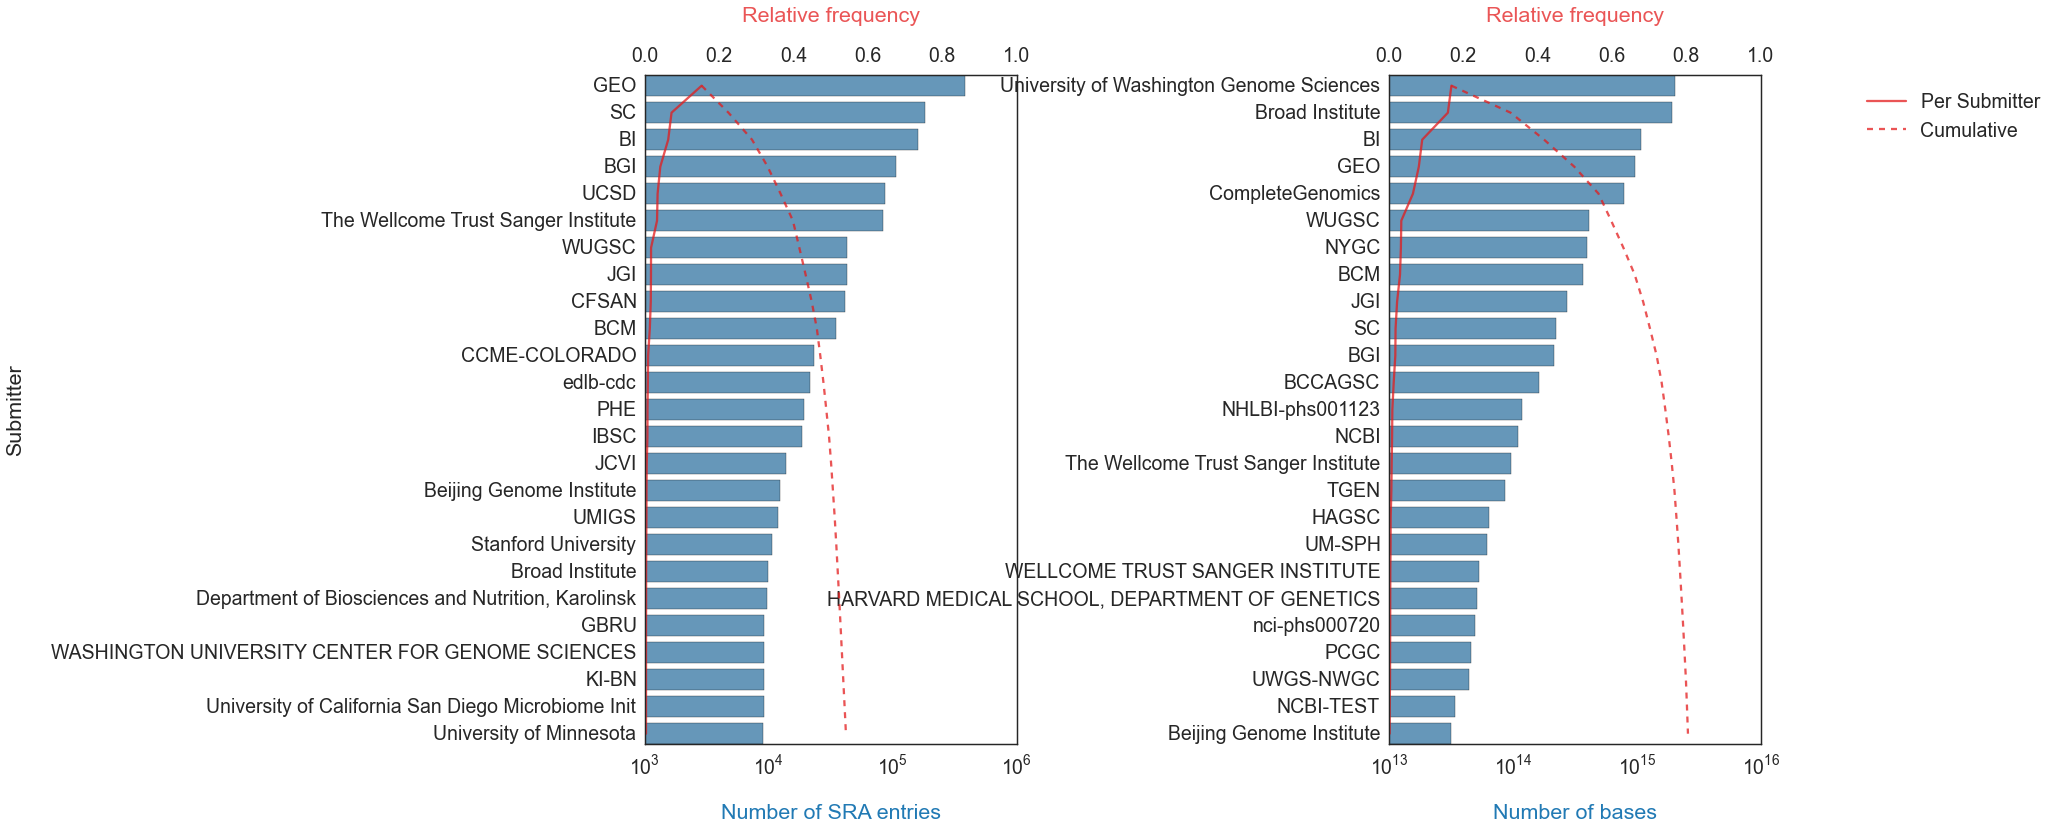

In [24]:
stats_by_category('Submitter')

In [25]:
def stats_by_study_accession():
      
    # plot backbone
    plt.close('all')
    f, axes = plt.subplots(1, 1, figsize = (5, 5)) 
    plt.subplots_adjust(wspace = 1.00, hspace = 0.50)
    colors = sns.color_palette("Paired")
    
    # count number of bases per library strategy
    groupby_names = ['Study Accession']
    _ = sra_dataset[['Study Accession', 'Total Bases']].groupby(groupby_names).sum()
    
    _.columns = ['bases']
    _['rel_bases'] = _['bases'] / sum(_['bases'])
    _ = _.sort_values(['bases'], ascending = False) 
    _ = _.reset_index()
    _['cumsum_rel_bases'] = _['rel_bases'].cumsum()
    _['terabases'] = _['bases'] / 1.0e12

    top = _.head(n = 10)
    otsv = '%s/tables/top_sra_contributors.tsv' % ANALYSIS
    top[['Study Accession', 'terabases', 'rel_bases']].to_csv(otsv, sep = '\t', index = False)
    print top[['Study Accession', 'terabases', 'rel_bases', 'cumsum_rel_bases']]
    
    # plot
    panel = axes
    panel.plot(range(len(_)), _['cumsum_rel_bases'], color = colors[1])
    panel.set_xlim(0, 100)
    k = "{:,}".format(len(_))
    panel.set_xlabel('Top 100 contributors\n(out of %s Study Accession IDs in the SRA)' % str(k),
                     labelpad = 25)
    panel.set_ylabel('Cumulative number of bp in SRA', labelpad = 25)
    
    # save figure
    opdf = '%s/figures/stats_by_study_accession.pdf' % (ANALYSIS)
    savefig(opdf, bbox_inches = 'tight', dpi = 300)

  Study Accession    terabases  rel_bases  cumsum_rel_bases
0       SRP067114  1047.660721   0.084359          0.084359
1       SRP062442   883.788571   0.071164          0.155523
2       SRP067333   491.256396   0.039557          0.195079
3       SRP070608   299.723368   0.024134          0.219214
4       SRP070605   286.856197   0.023098          0.242312
5       SRP068578   284.470974   0.022906          0.265218
6       SRP064110   265.323300   0.021364          0.286582
7       SRP066952   261.213507   0.021033          0.307615
8       SRP011999   247.869329   0.019959          0.327574
9       SRP070609   178.614839   0.014382          0.341956


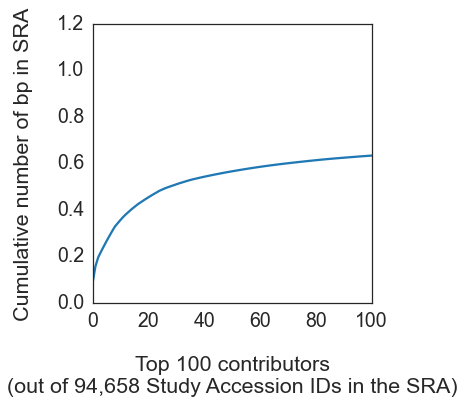

In [26]:
stats_by_study_accession()

# Sequences generated by the 4DGenome

In [27]:
def sequences_generated_4dgenome(year):
    
    from datetime import datetime
    import matplotlib.dates as mdates

    def add_reference_line(panel, yvalue, ylabel):
        
        panel.axhline(log10(yvalue), color = 'gray', linewidth = 0.50, linestyle = '--')
        panel.text('2016/10/01', log10(yvalue) - 0.40, ylabel, color = 'gray', fontsize = 16)
        
    # import metadata
    icsv = '%s/data/input_metadata.csv' % ANALYSIS
    input_metadata = pd.read_table(icsv, sep = ',')
    
    # import information about reads
    icsv = '%s/data/quality_control_raw_reads.csv' % ANALYSIS
    quality_control_raw_reads = pd.read_table(icsv, sep = ',')
    
    # combine data
    df = pd.merge(quality_control_raw_reads, input_metadata, on = 'SAMPLE_ID')
    
    # remove test samples and samples from Rao et al.
    cond1 = df['SAMPLE_ID'] != 'TE_S_T'
    cond2 = df['SAMPLE_ID'] != 'TE_1_1'
    cond3 = df['SAMPLE_ID'] != 'TE_1_2'   
    cond4 = df['SEQUENCING_CORE'] != 'Baylor'
    cond5 = df['SEQUENCING_CORE'] != 'Emory'
    df_filtered = df[cond1 & cond2 & cond3 & cond4 & cond5].reset_index()
    
    # calculate the number of bases
    df_filtered['BASES'] = df_filtered['READ1_N_READS_SEQUENCED'] * df_filtered['READ_LENGTH'] * 2
    df_filtered['TERABASES'] = df_filtered['BASES'] / 1e12   
    
    # treat the date of the sequening run as date and sort by date
    df_filtered['DATE'] = pd.to_datetime(df_filtered['SEND_FOR_SEQUENCING_ON'])
    df_filtered = df_filtered.sort_values(['DATE']).reset_index(drop = True)
    
    # accumulated number of bases
    df_filtered['BASES_ACCUMULATED'] = df_filtered['BASES'].cumsum()

    # plot backbone
    plt.close('all')
    f, axes = plt.subplots(1, 1, figsize = (5, 5)) 
    colors = sns.color_palette("Paired")
    
    axes.plot(df_filtered['DATE'], log10(df_filtered['BASES_ACCUMULATED']), color = colors[1])
    plt.setp(axes.xaxis.get_majorticklabels(), rotation = 90)           
    axes.set_xlabel('Year', labelpad = 25)
    axes.set_ylabel('Total bases [log10]', labelpad = 25)
    axes.set_ylim(10, 17)
    add_reference_line(axes, 1e12, 'Tera')
    add_reference_line(axes, 1e15, 'Peta')
    plt.xticks(['2014', '2015', '2016', '2017'])
    axes.set_xlim(['2013-06-01', '2017-04-01'])
    myFmt = mdates.DateFormatter('%Y')
    axes.xaxis.set_major_formatter(myFmt)
        
    # save figure
    opdf = '%s/figures/sequences_generated_4dgenome.pdf' % (ANALYSIS)
    savefig(opdf, bbox_inches = 'tight', dpi = 300)
    
    _ = df_filtered[df_filtered['DATE'] > '01/01/%s' % str(year)].reset_index(drop = True)
    _['gigabases'] = _['BASES_ACCUMULATED'] / 1e9
    _['terabases'] = _['BASES_ACCUMULATED'] / 1e12
    _['petabases'] = _['BASES_ACCUMULATED'] / 1e15
    print _[['DATE', 'gigabases', 'terabases', 'petabases']].head(n = 1)

        DATE    gigabases  terabases  petabases
0 2017-01-06  9011.607502   9.011608   0.009012


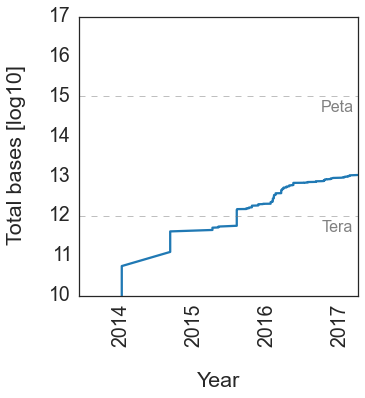

In [28]:
sequences_generated_4dgenome(2017)